In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readFile(filename):
    with open(filename, 'r') as csv_file:
        lines = csv_file.readlines()
    X = []
    Y = []
    
    for l in lines:
        row = l.strip().split(",")
        X.append([float(x) for x in row[:-1]])
        Y.append(int(row[-1]))
        
    X = np.array(X)
    Y = np.array(Y)
    data = np.column_stack((X, Y))

    return data


In [3]:
def normalize(data):
    means = []
    stds = []

    for i in range(data.shape[1] - 1):
        column = data[:, i]
        mean = np.sum(column) / len(column)
        std = np.sqrt(np.sum((column - mean) ** 2) / len(column))
        
        means.append(mean)
        stds.append(std)

    means = np.array(means)
    stds = np.array(stds)

    for i in range(data.shape[1] - 1):
        data[:, i] = (data[:, i] - means[i]) / stds[i]

    return data

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train(data, iterations, learning_rate, lambda_reg):
    np.random.seed(0) 
    X, y = data[:, :-1], data[:, -1]
    w = np.random.rand(X.shape[1])
    b = np.random.rand()
    m = len(y)

    for n in range(iterations):
        dw = np.zeros(len(w))
        db = 0
        total_loss = 0

        # For each row
        for i in range(m):
            xi = X[i]
            yi = y[i]
            z = b

            # For each feature
            for j in range(len(w)):
                z += w[j] * xi[j]
            
            y_hat = sigmoid(z)
            error = y_hat - yi

            # Update gradients
            for j in range(len(w)):
                dw[j] += error * xi[j]
            db += error

            # Aggregate for cost computation
            total_loss += (yi * np.log(y_hat)) + (1 - yi) * np.log(1 - y_hat)

        cost = (-1 / m) * total_loss + (lambda_reg / (2 * len(w))) * np.sum(w ** 2)

        # Update weights and bias
        w -= learning_rate * (dw / m + (lambda_reg / m) * w)
        b -= learning_rate * db / m

        print(f"Iteration {n+1}/{iterations} - Cost: {cost}")

    return w, b


In [5]:
def predict(w, b, x, trashold=0.5):
    z = b
    for j in range(len(w)):
        z += w[j] * x[j]

    y_hat = sigmoid(z)
    return 1 if y_hat > trashold else 0


In [6]:
def accuracy(w, b, data):
    X, y_true = data[:, :-1], data[:, -1]
    correct_predictions = 0
    m = len(y_true)

    for i in range(m):
        xi = X[i]
        yi = y_true[i]
        y_pred = predict(w, b, xi)
        if y_pred == yi:
            correct_predictions += 1

    return correct_predictions / m

In [7]:
import numpy as np

def compute_metrics(w, b, np_Xy):
    TP = []
    FP = []
    TN = []
    FN = []
    
    for i in np.arange(0.1, 1, 0.1):
        tp, fp, tn, fn = 0, 0, 0, 0
        for element in np_Xy:
            if predict(w, b, element[0:11], i) == element[11]:
                if element[11] == 1:
                    tp += 1
                else:
                    tn += 1
            else:
                if element[11] == 1:
                    fn += 1
                else:
                    fp += 1
        TP.append(tp)
        FP.append(fp)
        TN.append(tn)
        FN.append(fn)
    
    return TP, FP, TN, FN

In [8]:
d = readFile('data/botnet_tot_syn_l.csv')
d = normalize(d)
w, b = train(d, 10, 1.5, 0)
acc = accuracy(w, b, d)
print(f"Accuracy: {acc}")

TP, FP, TN, FN = compute_metrics(w, b, d)


Iteration 1/10 - Cost: 1.4998030671357732
Iteration 2/10 - Cost: 0.7452491273037543
Iteration 3/10 - Cost: 0.4463838653241005
Iteration 4/10 - Cost: 0.33598210709513854
Iteration 5/10 - Cost: 0.2858186861975213
Iteration 6/10 - Cost: 0.25817417377106544
Iteration 7/10 - Cost: 0.24076133573753333
Iteration 8/10 - Cost: 0.22876056610474765
Iteration 9/10 - Cost: 0.21995387544015582
Iteration 10/10 - Cost: 0.21318893422095375
Accuracy: 0.930181


accuracy: [0.777585 0.858916 0.897581 0.919363 0.930181 0.931607 0.918127 0.8758
 0.774564]
precision: [0.6927928  0.78373883 0.84052355 0.8827555  0.91533445 0.94195312
 0.96296928 0.98013533 0.99250915]
recall: [0.99749  0.991392 0.98136  0.967184 0.948054 0.919902 0.869698 0.767148
 0.553304]
F1: [0.81767843 0.87541988 0.90549826 0.92304315 0.93140696 0.93079698
 0.91396018 0.86066048 0.71051185]


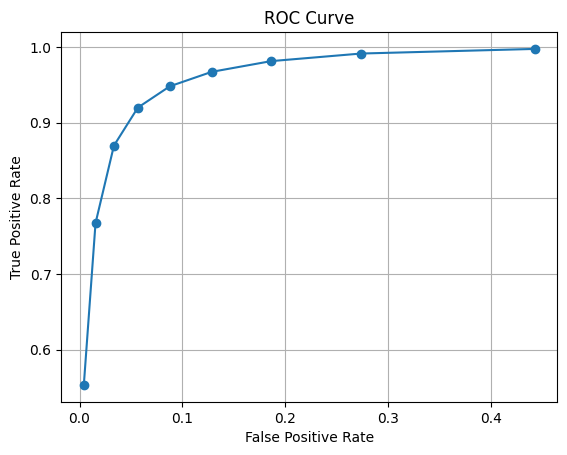

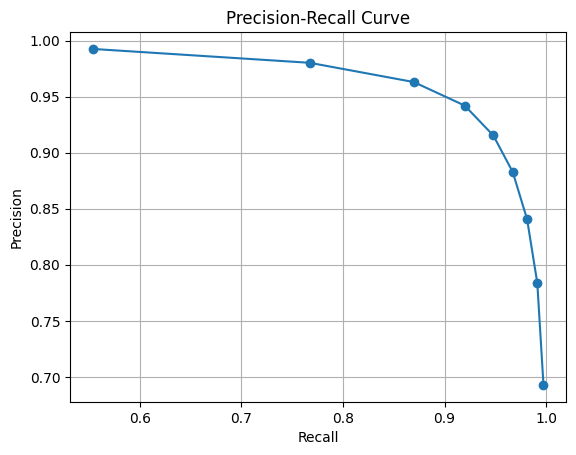

threshold: 0.1
TP: 498745
FP: 221160
TN: 278840
FN: 1255
accuracy: 0.777585
precision: 0.6927927990498747
recall: 0.99749
F1: 0.8176784257790566

threshold: 0.2
TP: 495696
FP: 136780
TN: 363220
FN: 4304
accuracy: 0.858916
precision: 0.7837388296156692
recall: 0.991392
F1: 0.8754198764477128

threshold: 0.3
TP: 490680
FP: 93099
TN: 406901
FN: 9320
accuracy: 0.897581
precision: 0.8405235542902365
recall: 0.98136
F1: 0.9054982611768635

threshold: 0.4
TP: 483592
FP: 64229
TN: 435771
FN: 16408
accuracy: 0.919363
precision: 0.8827554986026458
recall: 0.967184
F1: 0.9230431533630268

threshold: 0.5
TP: 474027
FP: 43846
TN: 456154
FN: 25973
accuracy: 0.930181
precision: 0.9153344545863561
recall: 0.948054
F1: 0.93140696334415

threshold: 0.6
TP: 459951
FP: 28344
TN: 471656
FN: 40049
accuracy: 0.931607
precision: 0.9419531226000676
recall: 0.919902
F1: 0.9307969786349217

threshold: 0.7
TP: 434849
FP: 16722
TN: 483278
FN: 65151
accuracy: 0.918127
precision: 0.9629692783637568
recall: 0.869698


In [10]:
TP = np.array(TP)
FP = np.array(FP)
TN = np.array(TN)
FN = np.array(FN)
#Accuracy
accuracy = (TP + TN) / (TP + FP + TN + FN)
print("accuracy:", accuracy)
#Precision
precision = TP / (TP + FP)
print("precision:", precision)
#Recall
recall = TP / (TP + FN)
print("recall:", recall)
#F1
F1 = 2 * precision * recall / (precision + recall)
print("F1:", F1)
#ROC
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
plt.plot(FPR, TPR, marker='o')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()
#Precision-Recall
plt.plot(recall, precision, marker='o')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()
for i in range(9):
    print("threshold:", (i+1)/10)
    print("TP:", TP[i])
    print("FP:", FP[i])
    print("TN:", TN[i])
    print("FN:", FN[i])
    print("accuracy:", accuracy[i])
    print("precision:", precision[i])
    print("recall:", recall[i])
    print("F1:", F1[i])
    print("")